<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 25px; font-weight: 700; white-space: pre-wrap;"> CUSTOMER CHURN ANALYSIS
</span>

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;">IMPORTING LIBRARY
</span>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> LOADING DATASET
</span>

In [2]:
path = 'C:/Users/USER/python/project/Telco customer churn/dataset'

In [3]:
demographics = pd.read_csv(path + '/demographics.csv')
services = pd.read_csv(path + '/services.csv')
status = pd.read_csv(path + '/status.csv')

In [4]:
sources =[demographics, services, status] 
names = ['demographics','services','status']

In [5]:
d = {}
for i in range(len(sources)):
    d['{}'.format(names[i])] = pd.Series(list(sources[i].columns))

D = pd.DataFrame.from_dict(d).fillna('')
D

,demographics,services,status
0,Customer ID,Customer ID,Customer ID
1,Count,Count,Count
2,Gender,Quarter,Quarter
3,Age,Referred a Friend,Satisfaction Score
4,Under 30,Number of Referrals,Customer Status
5,Senior Citizen,Tenure in Months,Churn Label
6,Married,Offer,Churn Value
7,Dependents,Phone Service,Churn Score
8,Number of Dependents,Avg Monthly Long Distance Charges,CLTV
9,,Multiple Lines,Churn Category


In [6]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           7043 non-null   object
 1   Count                 7043 non-null   int64 
 2   Gender                7043 non-null   object
 3   Age                   7043 non-null   int64 
 4   Under 30              7043 non-null   object
 5   Senior Citizen        7043 non-null   object
 6   Married               7043 non-null   object
 7   Dependents            7043 non-null   object
 8   Number of Dependents  7043 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 495.3+ KB


In [7]:
services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              3166 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      5517 non-null   objec

In [8]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         7043 non-null   object
 1   Count               7043 non-null   int64 
 2   Quarter             7043 non-null   object
 3   Satisfaction Score  7043 non-null   int64 
 4   Customer Status     7043 non-null   object
 5   Churn Label         7043 non-null   object
 6   Churn Value         7043 non-null   int64 
 7   Churn Score         7043 non-null   int64 
 8   CLTV                7043 non-null   int64 
 9   Churn Category      1869 non-null   object
 10  Churn Reason        1869 non-null   object
dtypes: int64(5), object(6)
memory usage: 605.4+ KB


<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> PROCESSING DATA
</span>

In [9]:
# 1. Remove unnecessary columns 

demographics = demographics.drop('Count', axis=1)
demographics = demographics.drop('Under 30', axis=1)
demographics = demographics.drop('Senior Citizen', axis=1)
demographics = demographics.drop('Dependents', axis=1)
demographics = demographics.drop('Number of Dependents', axis=1)

services = services.drop('Count', axis=1)
services = services.drop('Quarter', axis=1)
services = services.drop('Referred a Friend', axis=1)
services = services.drop('Number of Referrals', axis=1)
services = services.drop('Offer', axis=1)
services = services.drop('Avg Monthly Long Distance Charges', axis=1)
services = services.drop('Avg Monthly GB Download', axis=1)
services = services.drop('Total Charges', axis=1)
services = services.drop('Total Refunds', axis=1)
services = services.drop('Total Extra Data Charges', axis=1)
services = services.drop('Total Long Distance Charges', axis=1)

status = status.drop('Count', axis=1)
status = status.drop('Quarter', axis=1)
status = status.drop('Customer Status', axis=1)
status = status.drop('Churn Score', axis=1)
status = status.drop('CLTV', axis=1)

In [10]:
# 2. Merge dataset
# merge 'demographics_services'
dem_ser = demographics.merge(services, on='Customer ID', how='inner')
#merge'demographics_services_status'
df = dem_ser.merge(status, on='Customer ID', how= 'inner')

df.head(10)

,Customer ID,Gender,Age,Married,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Revenue,Satisfaction Score,Churn Label,Churn Value,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,1,No,No,Yes,DSL,No,...,Month-to-Month,Yes,Bank Withdrawal,39.65,59.65,3,Yes,1,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,Yes,8,Yes,Yes,Yes,Fiber Optic,No,...,Month-to-Month,Yes,Credit Card,80.65,1024.10,3,Yes,1,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,18,Yes,Yes,Yes,Fiber Optic,No,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1910.88,2,Yes,1,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,Yes,25,Yes,No,Yes,Fiber Optic,No,...,Month-to-Month,Yes,Bank Withdrawal,98.50,2995.07,2,Yes,1,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,Yes,37,Yes,Yes,Yes,Fiber Optic,No,...,Month-to-Month,Yes,Bank Withdrawal,76.50,3102.36,2,Yes,1,Price,Extra data charges
5,4412-YLTKF,Female,72,No,27,Yes,Yes,Yes,Fiber Optic,No,...,Month-to-Month,Yes,Bank Withdrawal,78.05,2235.41,1,Yes,1,Competitor,Competitor had better devices
6,0390-DCFDQ,Female,76,Yes,1,Yes,No,Yes,Fiber Optic,No,...,Month-to-Month,Yes,Mailed Check,70.45,85.73,2,Yes,1,Other,Don't know
7,3445-HXXGF,Male,66,Yes,58,No,No,Yes,DSL,No,...,Month-to-Month,Yes,Bank Withdrawal,45.30,2610.25,1,Yes,1,Dissatisfaction,Service dissatisfaction
8,2656-FMOKZ,Female,70,No,15,Yes,Yes,Yes,Fiber Optic,No,...,Month-to-Month,Yes,Mailed Check,74.45,1806.75,2,Yes,1,Dissatisfaction,Limited range of services
9,2070-FNEXE,Female,77,No,7,Yes,No,Yes,Fiber Optic,Yes,...,Month-to-Month,No,Bank Withdrawal,76.45,681.20,2,Yes,1,Price,Lack of affordable download/upload speed


<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> II. CORRELATION ANALYSIS
</span>

In [39]:
# 1. Encoding
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})
df['Married'] = df['Married'].replace({'Yes':1,'No':0})
df['Phone Service'] = df['Phone Service'].replace({'Yes':1,'No':0})
df['Multiple Lines'] = df['Multiple Lines'].replace({'Yes':1,'No':0})
df['Internet Service'] = df['Internet Service'].replace({'Yes':1,'No':0})
df['Online Security'] = df['Online Security'].replace({'Yes':1,'No':0})
df['Online Backup'] = df['Online Backup'].replace({'Yes':1,'No':0})
df['Device Protection Plan'] = df['Device Protection Plan'].replace({'Yes':1,'No':0})
df['Premium Tech Support'] = df['Premium Tech Support'].replace({'Yes':1,'No':0})
df['Streaming TV'] = df['Streaming TV'].replace({'Yes':1,'No':0})
df['Streaming Movies'] = df['Streaming Movies'].replace({'Yes':1,'No':0})
df['Streaming Music'] = df['Streaming Music'].replace({'Yes':1,'No':0})
df['Unlimited Data'] = df['Unlimited Data'].replace({'Yes':1,'No':0})
df['Paperless Billing'] = df['Paperless Billing'].replace({'Yes':1,'No':0})

df= df.select_dtypes('number')
df.head(10)


,Gender,Age,Married,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection Plan,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Revenue,Satisfaction Score,Churn Value,Servies Used
0,1,78,0,1,0,0,1,0,0,1,...,0,1,0,0,1,39.65,59.65,3,1,4
1,0,74,1,8,1,1,1,0,1,0,...,0,0,0,1,1,80.65,1024.10,3,1,6
2,1,71,0,18,1,1,1,0,0,0,...,1,1,1,1,1,95.45,1910.88,2,1,8
3,0,78,1,25,1,0,1,0,1,1,...,1,1,0,1,1,98.50,2995.07,2,1,8
4,0,80,1,37,1,1,1,0,0,0,...,0,0,0,1,1,76.50,3102.36,2,1,5
5,0,72,0,27,1,1,1,0,0,1,...,0,0,0,0,1,78.05,2235.41,1,1,5
6,0,76,1,1,1,0,1,0,0,0,...,0,0,0,1,1,70.45,85.73,2,1,4
7,1,66,1,58,0,0,1,0,1,1,...,0,1,0,1,1,45.30,2610.25,1,1,6
8,0,70,0,15,1,1,1,0,0,0,...,0,0,0,1,1,74.45,1806.75,2,1,5
9,0,77,0,7,1,0,1,1,0,0,...,0,0,0,0,0,76.45,681.20,2,1,3


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  7043 non-null   int64  
 1   Age                     7043 non-null   int64  
 2   Married                 7043 non-null   int64  
 3   Tenure in Months        7043 non-null   int64  
 4   Phone Service           7043 non-null   int64  
 5   Multiple Lines          7043 non-null   int64  
 6   Internet Service        7043 non-null   int64  
 7   Online Security         7043 non-null   int64  
 8   Online Backup           7043 non-null   int64  
 9   Device Protection Plan  7043 non-null   int64  
 10  Premium Tech Support    7043 non-null   int64  
 11  Streaming TV            7043 non-null   int64  
 12  Streaming Movies        7043 non-null   int64  
 13  Streaming Music         7043 non-null   int64  
 14  Unlimited Data          7043 non-null   

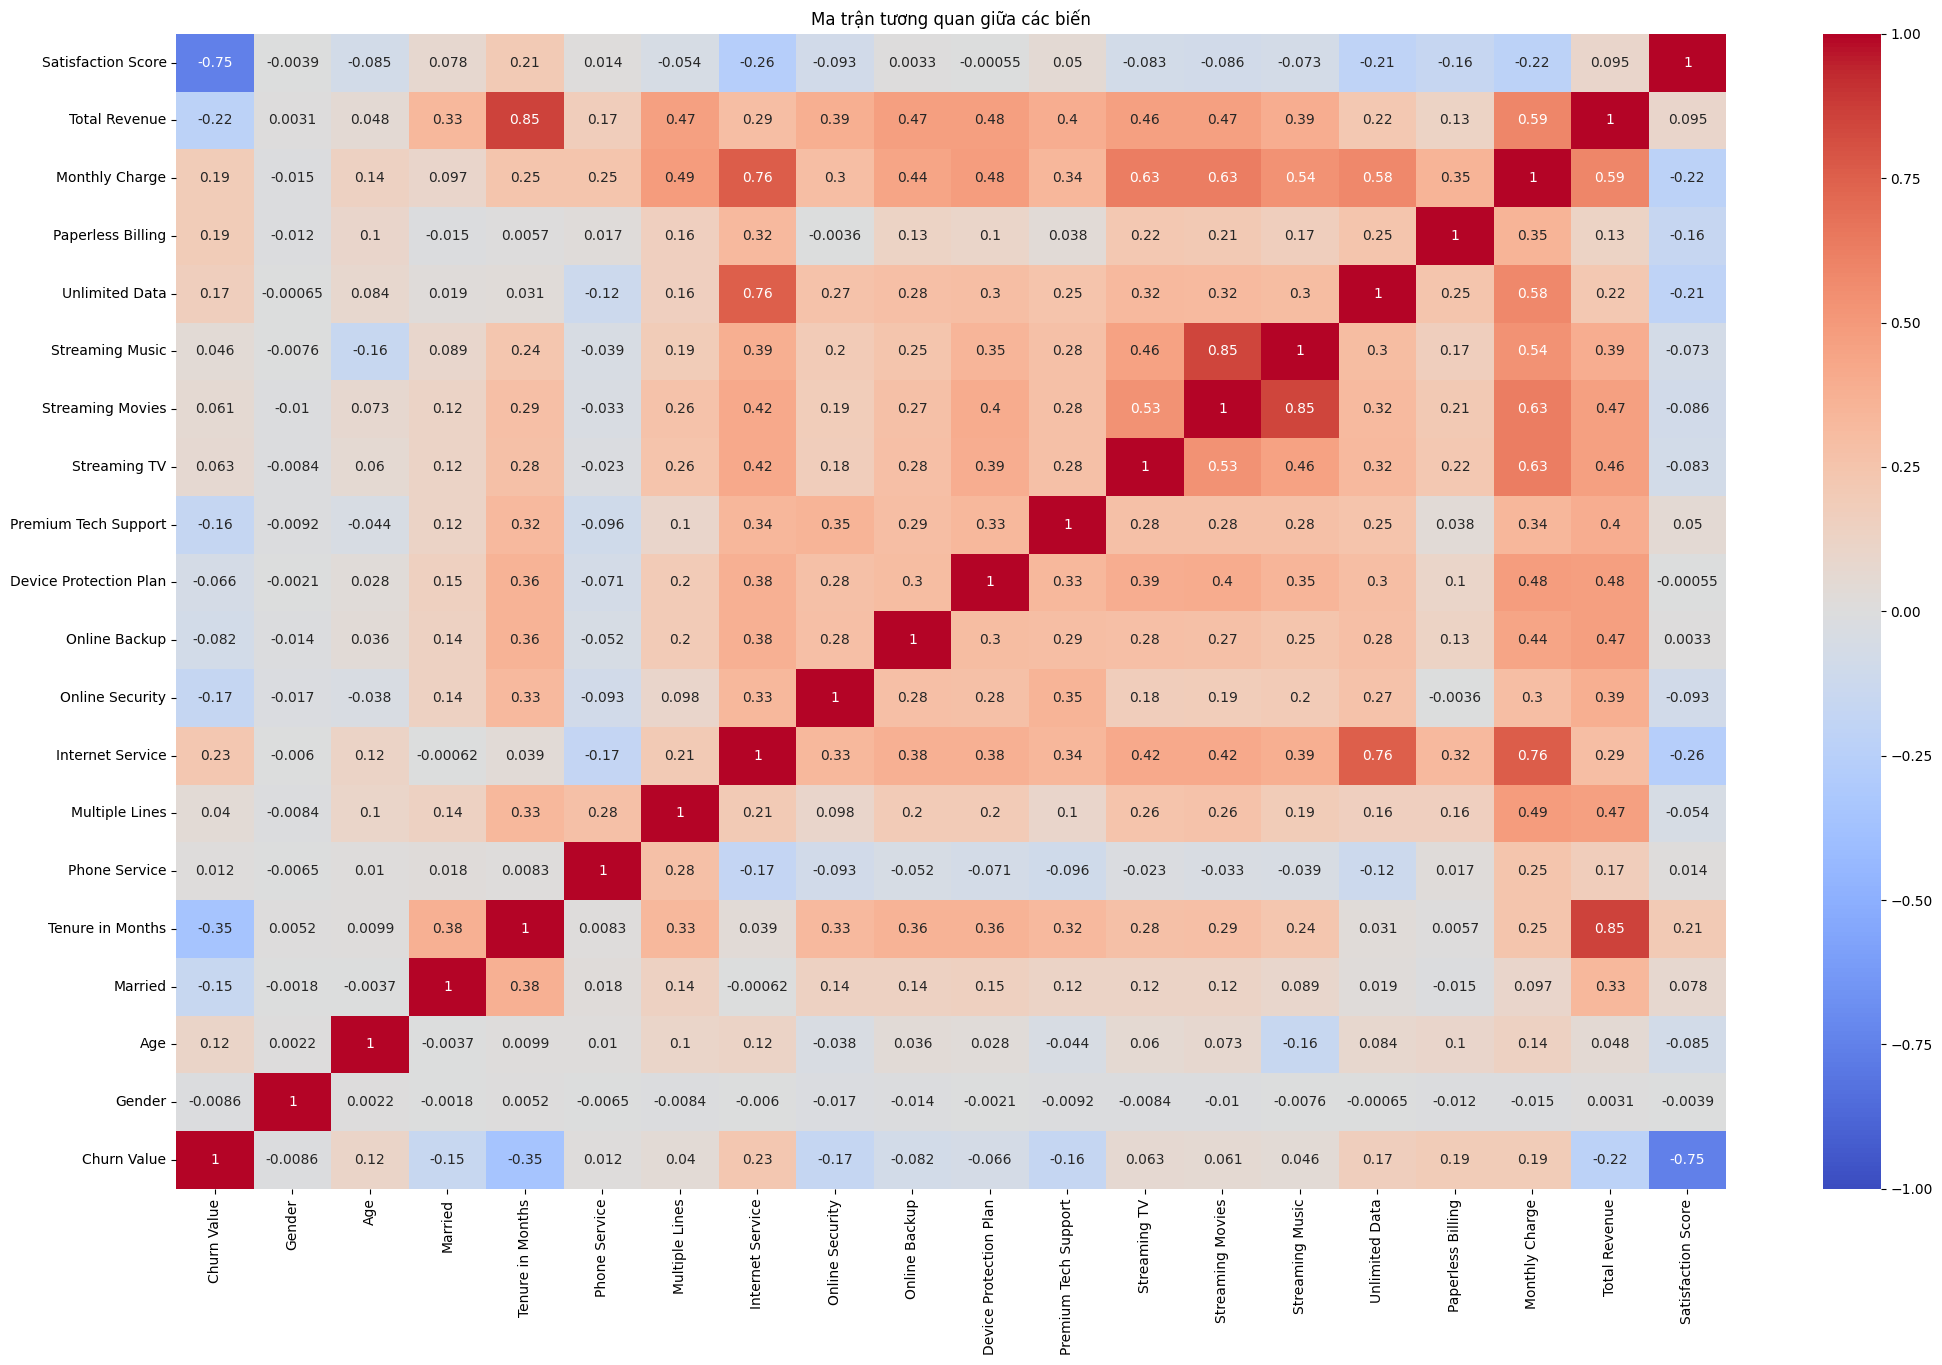

In [42]:
# 2. Tính ma trận tương quan (Pearson)
correlation_matrix = df.corr()
custom_order = ['Churn Value','Gender', 'Age', 'Married', 'Tenure in Months', 'Phone Service',
                'Multiple Lines','Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan',
                'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music',
                'Unlimited Data', 'Paperless Billing', 'Monthly Charge', 'Total Revenue',
                'Satisfaction Score']

correlation_matrix = correlation_matrix.loc[custom_order[::-1], custom_order]
# 3. Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan giữa các biến')
plt.show()

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> 1.1 The strongly influencing factors analysis
</span>

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> Positive correlation
</span>

In [14]:
 # Internet Service
stats_itn_service = df.groupby('Internet Service').agg(
    total_customer = ('Internet Service', 'count'),
    churned = ('Churn Value', 'sum')
).reset_index() 

stats_itn_service['churn rate'] = (stats_itn_service['churned'] / stats_itn_service['total_customer'] *100).round(2) 
stats_itn_service

,Internet Service,total_customer,churned,churn rate
0,0,1526,113,7.40
1,1,5517,1756,31.83


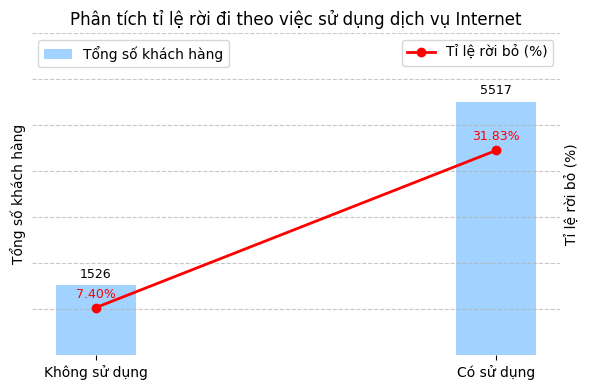

In [15]:
fig, ax1 = plt.subplots(figsize=(6, 4))

bar_width = 0.2

bars = ax1.bar(stats_itn_service['Internet Service'], stats_itn_service['total_customer'], width=bar_width, label='Tổng số khách hàng', color='#a2d2ff')

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax1.set_ylabel('Tổng số khách hàng')
ax1.set_ylim(0, 7000)
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Không sử dụng', 'Có sử dụng'])
ax1.legend(loc='upper left')

for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

ax2 = ax1.twinx()
ax2.plot(stats_itn_service['Internet Service'], stats_itn_service['churn rate'], label='Tỉ lệ rời bỏ (%)', color='red', marker='o', linewidth=2)
ax2.set_ylabel('Tỉ lệ rời bỏ (%)')
ax2.set_ylim(0, 50)
ax2.legend(loc='upper right')

for i, rate in enumerate(stats_itn_service['churn rate']):
    ax2.annotate(f'{rate:.2f}%',
                 xy=(i, rate),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, color='red')

ax1.tick_params(axis='y', left=False, labelleft=False)
ax2.tick_params(axis='y', right=False, labelright=False)
plt.title('Phân tích tỉ lệ rời đi theo việc sử dụng dịch vụ Internet')
plt.tight_layout()
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)
        
plt.show()

In [16]:
# Paperless Billing
stats_ppl_bill = df.groupby('Paperless Billing').agg(
    total_customer = ('Paperless Billing', 'count'),
    churned = ('Churn Value', 'sum')
).reset_index() 

stats_ppl_bill['churn rate'] = (stats_ppl_bill['churned'] / stats_ppl_bill['total_customer'] *100).round(2) 
stats_ppl_bill

,Paperless Billing,total_customer,churned,churn rate
0,0,2872,469,16.33
1,1,4171,1400,33.57


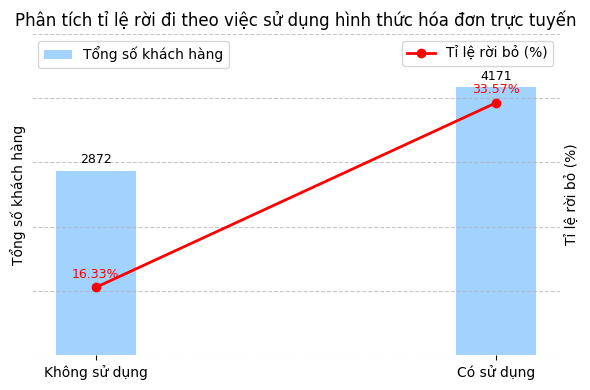

In [17]:
fig, ax1 = plt.subplots(figsize=(6, 4))

bar_width = 0.2

bars = ax1.bar(stats_ppl_bill['Paperless Billing'], stats_ppl_bill['total_customer'], width=bar_width, label='Tổng số khách hàng', color='#a2d2ff')

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax1.set_ylabel('Tổng số khách hàng')
ax1.set_ylim(0, 5000)
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Không sử dụng', 'Có sử dụng'])
ax1.legend(loc='upper left')

for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

ax2 = ax1.twinx()
ax2.plot(stats_ppl_bill['Paperless Billing'], stats_ppl_bill['churn rate'], label='Tỉ lệ rời bỏ (%)', color='red', marker='o', linewidth=2)
ax2.set_ylabel('Tỉ lệ rời bỏ (%)')
ax2.set_ylim(10, 40)
ax2.legend(loc='upper right')

ax1.tick_params(axis='y', left=False, labelleft=False)
ax2.tick_params(axis='y', right=False, labelright=False)
for i, rate in enumerate(stats_ppl_bill['churn rate']):
    ax2.annotate(f'{rate:.2f}%',
                 xy=(i, rate),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, color='red')

plt.title('Phân tích tỉ lệ rời đi theo việc sử dụng hình thức hóa đơn trực tuyến')
plt.tight_layout()
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)
plt.show()

In [18]:
# Monthly Charges

bins1 = [0, 20, 40, 60, 80, 100, float('inf')] 
labels1 = ['<20', '20-40', '40-60', '60-80', '80-100', '>100']
df['Monthly Charge Group'] = pd.cut(df['Monthly Charge'], bins=bins1, labels=labels1, right=False)

In [19]:
stats_monthly_charge = df.groupby('Monthly Charge Group').agg(
    total_customer = ('Monthly Charge Group', 'count'),
    churned = ('Churn Value', 'sum')
    
).reset_index() 

stats_monthly_charge['stayed'] = stats_monthly_charge['total_customer'] - stats_monthly_charge['churned']
stats_monthly_charge['churn rate'] = (stats_monthly_charge['churned'] / stats_monthly_charge['total_customer'] *100).round(2)

stats_monthly_charge

C:\Users\USER\AppData\Local\Temp\ipykernel_28952\350266209.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_monthly_charge = df.groupby('Monthly Charge Group').agg(


,Monthly Charge Group,total_customer,churned,stayed,churn rate
0,<20,613,55,558,8.97
1,20-40,1224,158,1066,12.91
2,40-60,1070,276,794,25.79
3,60-80,1459,470,989,32.21
4,80-100,1769,653,1116,36.91
5,>100,908,257,651,28.30


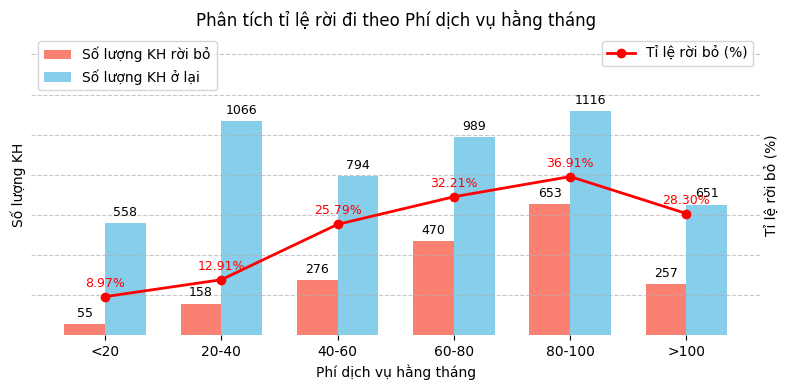

In [20]:
fig, ax1 = plt.subplots(figsize=(8, 4))

bar_width = 0.35
x = range(len(stats_monthly_charge))

bars1 = ax1.bar([i - bar_width/2 for i in x], stats_monthly_charge['churned'], width=bar_width, label='Số lượng KH rời bỏ', color='salmon')
bars2 = ax1.bar([i + bar_width/2 for i in x], stats_monthly_charge['stayed'], width=bar_width, label='Số lượng KH ở lại', color='skyblue')

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax1.set_xlabel('Phí dịch vụ hằng tháng')
ax1.set_ylabel('Số lượng KH')
ax1.set_ylim(0,1500)
ax1.set_xticks(x)
ax1.set_xticklabels(stats_monthly_charge['Monthly Charge Group'])
ax1.legend(loc='upper left')

for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

ax2 = ax1.twinx()
ax2.plot(x, stats_monthly_charge['churn rate'], label='Tỉ lệ rời bỏ (%)', color='red', marker='o', linewidth=2)
ax2.set_ylabel('Tỉ lệ rời bỏ (%)')
ax2.set_ylim(0, 70)
ax2.legend(loc='upper right')

for i, rate in enumerate(stats_monthly_charge['churn rate']):
    ax2.annotate(f'{rate:.2f}%',
                 xy=(i, rate),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, color='red')

ax1.tick_params(axis='y', left=False, labelleft=False)
ax2.tick_params(axis='y', right=False, labelright=False)
plt.title('Phân tích tỉ lệ rời đi theo Phí dịch vụ hằng tháng')
plt.tight_layout()
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)
plt.show()

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> Negative correlation
</span>

In [21]:
# Satisfaction Score
stats_satisfaction = df.groupby('Satisfaction Score').agg(
    total_customer = ('Satisfaction Score', 'count'),
    churned = ('Churn Value', 'sum')
    
).reset_index() 

stats_satisfaction['stayed'] = stats_satisfaction['total_customer'] - stats_satisfaction['churned']
stats_satisfaction['churn rate'] = (stats_satisfaction['churned'] / stats_satisfaction['total_customer'] *100).round(2)

stats_satisfaction

,Satisfaction Score,total_customer,churned,stayed,churn rate
0,1,922,922,0,100.0
1,2,518,518,0,100.0
2,3,2665,429,2236,16.1
3,4,1789,0,1789,0.0
4,5,1149,0,1149,0.0


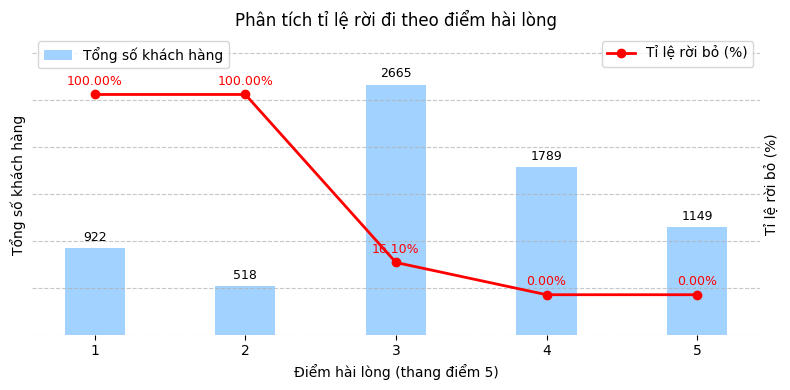

In [22]:
fig, ax1 = plt.subplots(figsize=(8, 4))

bar_width = 0.4
x = range(len(stats_satisfaction))
bars = ax1.bar(x, stats_satisfaction['total_customer'], width=bar_width, label='Tổng số khách hàng', color='#a2d2ff')

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax1.set_xlabel('Điểm hài lòng (thang điểm 5)')
ax1.set_ylabel('Tổng số khách hàng')
ax1.set_ylim(0, 3200)
ax1.set_xticks(x)
ax1.set_xticklabels(stats_satisfaction['Satisfaction Score'])
ax1.legend(loc='upper left')

for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

ax2 = ax1.twinx()
ax2.plot(x, stats_satisfaction['churn rate'], label='Tỉ lệ rời bỏ (%)', color='red', marker='o', linewidth=2)
ax2.set_ylabel('Tỉ lệ rời bỏ (%)')
ax2.set_ylim(-20, 130)
ax2.legend(loc='upper right')

for i, rate in enumerate(stats_satisfaction['churn rate']):
    ax2.annotate(f'{rate:.2f}%',
                 xy=(i, rate),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, color='red')

ax1.tick_params(axis='y', left=False, labelleft=False)
ax2.tick_params(axis='y', right=False, labelright=False)
plt.title('Phân tích tỉ lệ rời đi theo điểm hài lòng')
plt.tight_layout()
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)
plt.show()

In [23]:
# Tenure in Months
bins2 = [0, 12, 24, 48, 60, float('inf')] 
labels2 = ['<12', '12-24', '24-48', '48-60', '>60']
df['Tenure Group'] = pd.cut(df['Tenure in Months'], bins=bins2, labels=labels2, right=False)

stats_tenure = df.groupby(df['Tenure Group']).agg(
    total_customer = ('Tenure in Months', 'count'),
    churned = ('Churn Value', 'sum')
).reset_index()

stats_tenure['stayed'] = stats_tenure['total_customer'] - stats_tenure['churned']
stats_tenure['churn rate'] = (stats_tenure['churned'] / stats_tenure['total_customer'] *100).round(2)

stats_tenure

C:\Users\USER\AppData\Local\Temp\ipykernel_28952\1515535707.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_tenure = df.groupby(df['Tenure Group']).agg(


,Tenure Group,total_customer,churned,stayed,churn rate
0,<12,2069,999,1070,48.28
1,12-24,1047,309,738,29.51
2,24-48,1624,339,1285,20.87
3,48-60,820,123,697,15.00
4,>60,1483,99,1384,6.68


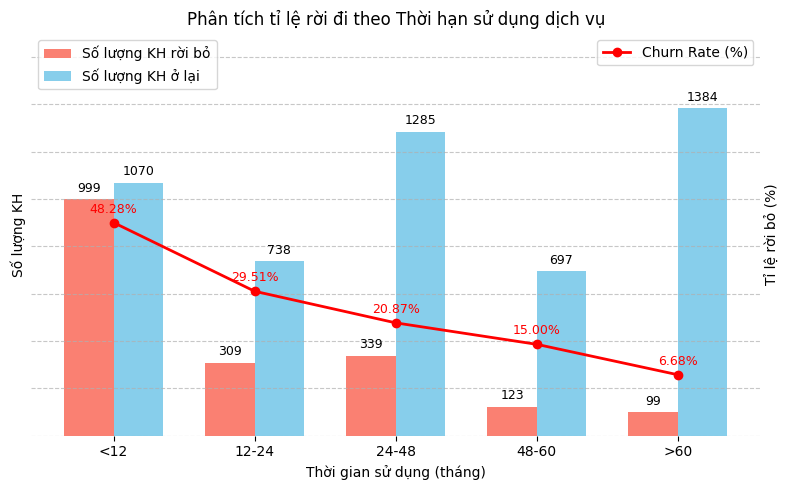

In [24]:
fig, ax1 = plt.subplots(figsize=(8, 5))

bar_width = 0.35
x = range(len(stats_tenure))

bars1 = ax1.bar([i - bar_width/2 for i in x], stats_tenure['churned'], width=bar_width, label='Số lượng KH rời bỏ', color='salmon')
bars2 = ax1.bar([i + bar_width/2 for i in x], stats_tenure['stayed'], width=bar_width, label='Số lượng KH ở lại', color='skyblue')

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax1.set_xlabel('Thời gian sử dụng (tháng)')
ax1.set_ylabel('Số lượng KH')
ax1.set_ylim(0,1700)
ax1.set_xticks(x)
ax1.set_xticklabels(stats_tenure['Tenure Group'])
ax1.legend(loc='upper left')

for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

ax2 = ax1.twinx()
ax2.plot(x, stats_tenure['churn rate'], label='Churn Rate (%)', color='red', marker='o', linewidth=2)
ax2.set_ylabel('Tỉ lệ rời bỏ (%)')
ax2.set_ylim(-10, 100)
ax2.legend(loc='upper right')

for i, rate in enumerate(stats_tenure['churn rate']):
    ax2.annotate(f'{rate:.2f}%',
                 xy=(i, rate),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, color='red')

ax1.tick_params(axis='y', left=False, labelleft=False)
ax2.tick_params(axis='y', right=False, labelright=False)
plt.title('Phân tích tỉ lệ rời đi theo Thời hạn sử dụng dịch vụ')
plt.tight_layout()
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)
plt.show()

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> 1.2 Other influencing factors analysis
</span>

In [25]:
# Other Services 
service_cols = ['Phone Service','Multiple Lines','Internet Service','Online Security', 'Online Backup', 'Device Protection Plan', 
                'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 
                'Streaming Music', 'Unlimited Data','Paperless Billing']
df['Servies Used'] = df[service_cols].sum(axis=1)

In [26]:
bins3 = [0,3,7,10, float('inf')]
labels3 = ['1-3','3-7','7-10','>10']
df['Services Used Group'] = pd.cut(df['Servies Used'], bins = bins3, labels = labels3, right = False) 

In [27]:
stats_services = df.groupby(df['Services Used Group']).agg(
    total_customer = ('Services Used Group', 'count'),
    churned = ('Churn Value', 'sum')
).reset_index()

stats_services['stayed'] = stats_services['total_customer'] - stats_services['churned']
stats_services['churn rate'] =  (stats_services['churned'] / stats_services['total_customer'] *100).round(2)
stats_services

C:\Users\USER\AppData\Local\Temp\ipykernel_28952\961041693.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_services = df.groupby(df['Services Used Group']).agg(


,Services Used Group,total_customer,churned,stayed,churn rate
0,1-3,1473,135,1338,9.16
1,3-7,2501,952,1549,38.06
2,7-10,2207,644,1563,29.18
3,>10,862,138,724,16.01


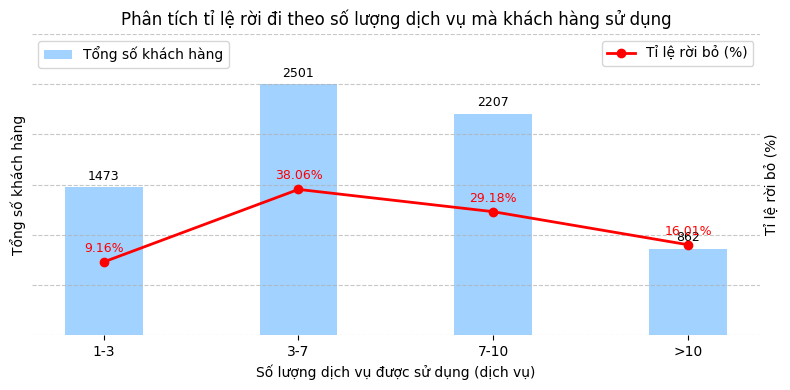

In [28]:
fig, ax1 = plt.subplots(figsize=(8, 4))

bar_width = 0.4
x = range(len(stats_services))
bars = ax1.bar(x, stats_services['total_customer'], width=bar_width, label='Tổng số khách hàng', color='#a2d2ff')

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax1.set_xlabel('Số lượng dịch vụ được sử dụng (dịch vụ)')
ax1.set_ylabel('Tổng số khách hàng')
ax1.set_ylim(0, 3000)
ax1.set_xticks(x)
ax1.set_xticklabels(stats_services['Services Used Group'])
ax1.legend(loc='upper left')

for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

ax2 = ax1.twinx()
ax2.plot(x, stats_services['churn rate'], label='Tỉ lệ rời bỏ (%)', color='red', marker='o', linewidth=2)
ax2.set_ylabel('Tỉ lệ rời bỏ (%)')
ax2.set_ylim(-20, 100)
ax2.legend(loc='upper right')

for i, rate in enumerate(stats_services['churn rate']):
    ax2.annotate(f'{rate:.2f}%',
                 xy=(i, rate),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, color='red')

ax1.tick_params(axis='y', left=False, labelleft=False)
ax2.tick_params(axis='y', right=False, labelright=False)
plt.title('Phân tích tỉ lệ rời đi theo số lượng dịch vụ mà khách hàng sử dụng')
plt.tight_layout()
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)
plt.show()

In [29]:
# Age
bins = [0, 20, 30, 40, 50, 60, float('inf')] 
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '>60']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [30]:
stats_age = df.groupby(df['Age Group']).agg(
    total_customer = ('Age Group', 'count'),
    churned = ('Churn Value', 'sum')
).reset_index()

stats_age['stayed'] = stats_age['total_customer'] - stats_age['churned']
stats_age['churn rate'] = (stats_age['churned'] / stats_age['total_customer'] *100).round(2)
stats_age

C:\Users\USER\AppData\Local\Temp\ipykernel_28952\1361472075.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_age = df.groupby(df['Age Group']).agg(


,Age Group,total_customer,churned,stayed,churn rate
0,<20,127,18,109,14.17
1,20-30,1274,286,988,22.45
2,30-40,1266,309,957,24.41
3,40-50,1342,318,1024,23.70
4,50-60,1252,307,945,24.52
5,>60,1782,631,1151,35.41


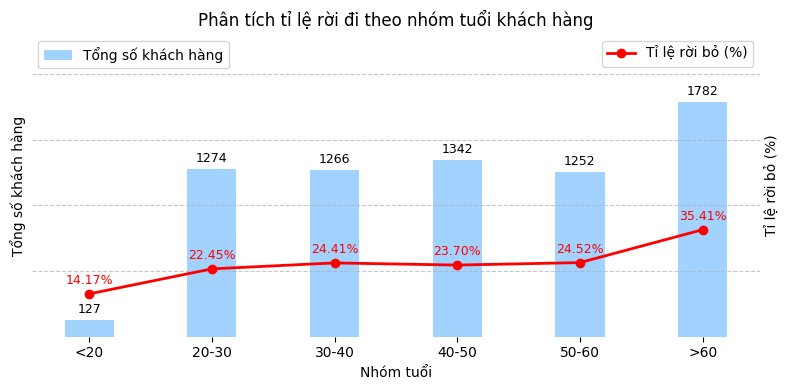

In [31]:
fig, ax1 = plt.subplots(figsize=(8, 4))

bar_width = 0.4
x = range(len(stats_age))
bars = ax1.bar(x, stats_age['total_customer'], width=bar_width, label='Tổng số khách hàng', color='#a2d2ff')

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax1.set_xlabel('Nhóm tuổi')
ax1.set_ylabel('Tổng số khách hàng')
ax1.set_ylim(0, 2300)
ax1.set_xticks(x)
ax1.set_xticklabels(stats_age['Age Group'])
ax1.legend(loc='upper left')

for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

ax2 = ax1.twinx()
ax2.plot(x, stats_age['churn rate'], label='Tỉ lệ rời bỏ (%)', color='red', marker='o', linewidth=2)
ax2.set_ylabel('Tỉ lệ rời bỏ (%)')
ax2.set_ylim(0, 100)
ax2.legend(loc='upper right')

for i, rate in enumerate(stats_age['churn rate']):
    ax2.annotate(f'{rate:.2f}%',
                 xy=(i, rate),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, color='red')

ax1.tick_params(axis='y', left=False, labelleft=False)
ax2.tick_params(axis='y', right=False, labelright=False)
plt.title('Phân tích tỉ lệ rời đi theo nhóm tuổi khách hàng')
plt.tight_layout()
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)
plt.show()

In [32]:
# Total Revenue 

bins4 = [0, 500, 2000, 5000, 8000, 10000, float('inf')] 
labels4 = ['<500', '500-2000', '2000-5000', '5000-8000', '8000-10000', '>10000']

df['Total Charges Group'] = pd.cut(df['Total Revenue'], bins=bins4, labels=labels4, right=False)

In [33]:
stats_total_charge = df.groupby(df['Total Charges Group']).agg(
    total_customer = ('Total Charges Group', 'count'),
    churned = ('Churn Value', 'sum')
).reset_index()

stats_total_charge['stayed'] = stats_total_charge['total_customer'] - stats_total_charge['churned']
stats_total_charge['churn rate'] = (stats_total_charge['churned'] / stats_total_charge['total_customer'] *100).round(2)
stats_total_charge

C:\Users\USER\AppData\Local\Temp\ipykernel_28952\3009436514.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_total_charge = df.groupby(df['Total Charges Group']).agg(


,Total Charges Group,total_customer,churned,stayed,churn rate
0,<500,1594,742,852,46.55
1,500-2000,1828,520,1308,28.45
2,2000-5000,1937,360,1577,18.59
3,5000-8000,1106,172,934,15.55
4,8000-10000,455,61,394,13.41
5,>10000,123,14,109,11.38


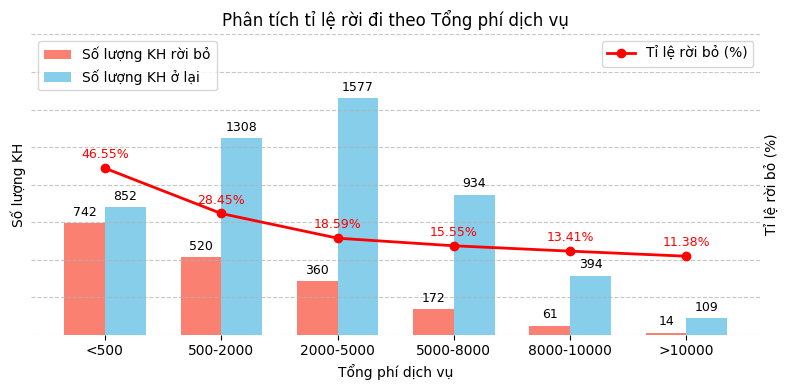

In [34]:
fig, ax1 = plt.subplots(figsize=(8, 4))

bar_width = 0.35
x = range(len(stats_total_charge))

bars1 = ax1.bar([i - bar_width/2 for i in x], stats_total_charge['churned'], width=bar_width, label='Số lượng KH rời bỏ', color='salmon')
bars2 = ax1.bar([i + bar_width/2 for i in x], stats_total_charge['stayed'], width=bar_width, label='Số lượng KH ở lại', color='skyblue')

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax1.set_xlabel('Tổng phí dịch vụ')
ax1.set_ylabel('Số lượng KH')
ax1.set_ylim(0,2000)
ax1.set_xticks(x)
ax1.set_xticklabels(stats_total_charge['Total Charges Group'])
ax1.legend(loc='upper left')

for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

ax2 = ax1.twinx()
ax2.plot(x, stats_total_charge['churn rate'], label='Tỉ lệ rời bỏ (%)', color='red', marker='o', linewidth=2)
ax2.set_ylabel('Tỉ lệ rời bỏ (%)')
ax2.set_ylim(-20, 100)
ax2.legend(loc='upper right')

for i, rate in enumerate(stats_total_charge['churn rate']):
    ax2.annotate(f'{rate:.2f}%',
                 xy=(i, rate),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, color='red')

ax1.tick_params(axis='y', left=False, labelleft=False)
ax2.tick_params(axis='y', right=False, labelright=False)
plt.title('Phân tích tỉ lệ rời đi theo Tổng phí dịch vụ')
plt.tight_layout()
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)
plt.show()

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> III. CUSTOMER CHURN PREDICTION
</span>

In [35]:
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, 
                             recall_score, ConfusionMatrixDisplay,
                             classification_report, roc_auc_score, roc_curve, RocCurveDisplay)
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV, StratifiedKFold
from scipy.stats import randint


from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import itertools

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> 3.1 Shuffle data
</span>

In [43]:
df = shuffle(df, random_state=42).reset_index(drop=True)
df.head(10)

,Gender,Age,Married,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection Plan,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Revenue,Satisfaction Score,Churn Value,Servies Used
0,0,73,1,47,1,0,1,0,0,0,...,0,0,0,1,0,70.55,4548.91,3,1,3
1,1,64,0,50,1,1,0,0,0,0,...,0,0,0,0,0,24.90,3553.25,4,0,2
2,1,28,1,52,1,0,1,1,1,0,...,1,1,1,1,1,75.40,4406.25,5,0,9
3,0,35,1,11,1,0,0,0,0,0,...,0,0,0,0,1,19.25,499.41,1,1,2
4,1,67,1,13,1,1,1,0,0,0,...,1,1,1,1,1,95.25,1597.66,1,1,8
5,0,30,0,3,1,0,1,0,0,0,...,0,0,0,1,1,69.55,301.08,1,1,4
6,1,64,1,72,1,1,1,1,1,1,...,1,1,1,1,1,114.10,9761.84,3,0,12
7,0,46,0,4,1,0,1,0,0,0,...,0,0,0,1,1,70.05,317.22,1,1,4
8,1,71,0,55,0,0,1,0,0,1,...,1,1,0,1,1,50.05,2743.45,4,0,6
9,1,29,0,3,0,0,1,1,1,0,...,0,0,0,1,1,35.45,106.85,1,1,5


In [44]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [45]:
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, stratify=y)

In [46]:
X_train.shape

(4930, 20)

In [47]:
X_test.shape

(2113, 20)

In [48]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,               
    min_samples_split=5,        
    min_samples_leaf=3,         
    max_features='sqrt',        
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [49]:
n_nodes = []
max_depths = []

for ind_tree in rf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Total number of nodes {int(np.sum(n_nodes))}')
print(f'Total maximum depth {int(np.sum(max_depths))}')

Total number of nodes 92716
Total maximum depth 3000


In [50]:
train_rf_pred = rf.predict(X_train)
train_rf_proba = rf.predict_proba(X_train)[:,1]
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]

In [51]:
print(classification_report(y_test, rf_pred))
print('ROC‑AUC:', roc_auc_score(y_test, rf_proba).round(3))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1552
           1       0.91      0.90      0.91       561

    accuracy                           0.95      2113
   macro avg       0.94      0.93      0.94      2113
weighted avg       0.95      0.95      0.95      2113

ROC‑AUC: 0.988


In [52]:
print('Accuracy:', accuracy_score(y_test, rf_pred))

Accuracy: 0.9498343587316611


In [53]:
def evaluate_model(prediction, proba, train_pred, train_proba):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, rf_pred)
    results['precision'] = precision_score(y_test, rf_pred)
    results['roc'] = roc_auc_score(y_test, rf_proba)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_rf_pred)
    train_results['precision'] = precision_score(y_train, train_rf_pred)
    train_results['roc'] = roc_auc_score(y_train, train_rf_proba)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, rf_proba)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 1.0 Test: 0.9 Train: 0.94
Precision Baseline: 0.27 Test: 0.91 Train: 0.95
Roc Baseline: 0.5 Test: 0.99 Train: 1.0


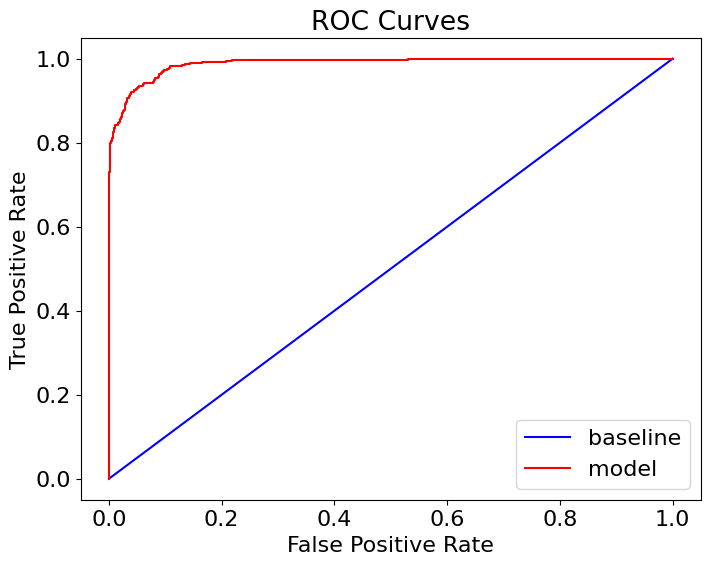

In [54]:
evaluate_model(rf_pred, rf_proba, train_rf_pred, train_rf_proba)

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 15,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('Giá trị thực tế', size = 10)
    plt.xlabel('Giá trị dự đoán', size = 10)

Confusion matrix, without normalization
[[1501   51]
 [  55  506]]


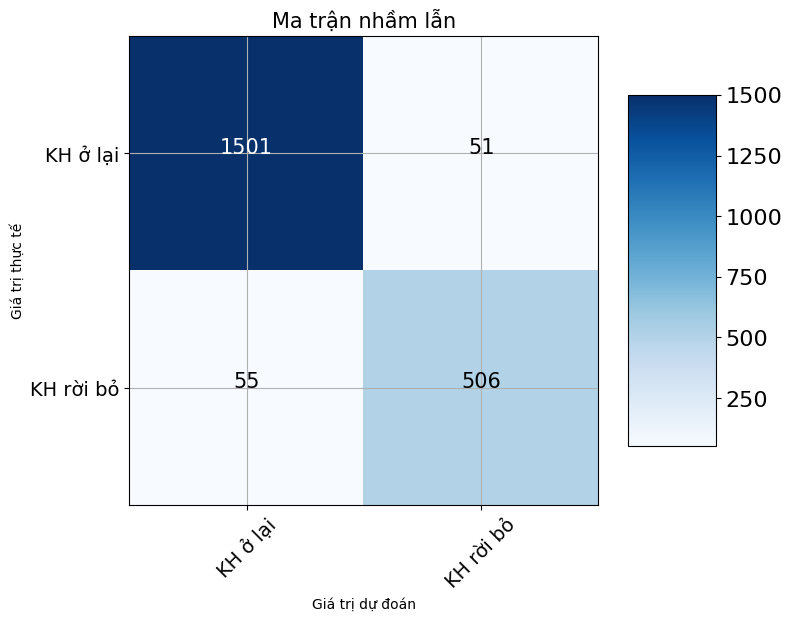

In [56]:
cm = confusion_matrix(y_test, rf_pred)
plot_confusion_matrix(cm, classes = ['KH ở lại', 'KH rời bỏ'],
                      title = 'Ma trận nhầm lẫn')